# Installing Netwokx Library

In [1]:
# Execute this once, the first time you run
!pip install networkx

# Disable Python warning messages - you should probably only run this before submission

import warnings
warnings.filterwarnings('ignore')

# Spark Setup

In [2]:
Connect to Spark 
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

spark = SparkSession.builder.appName('Graphs').getOrCreate()

# Loading Data

In [4]:
# Load data 

answers_sdf = spark.read.load('sx-stackoverflow-a2q.txt', format="text") 

comments_answers_sdf = spark.read.load('sx-stackoverflow-c2a.txt', format="text")

comments_questions_sdf = spark.read.load('sx-stackoverflow-c2q.txt', format="text")


In [6]:
answers_sdf.count()

17823525

In [7]:
answers_sdf.show(10)

+----------------+
|           value|
+----------------+
|  9 8 1217567877|
|  1 1 1217573801|
| 13 1 1217606247|
| 17 1 1217617639|
| 48 2 1217618182|
| 17 1 1217618239|
| 19 9 1217618357|
|13 23 1217618560|
|13 11 1217618799|
|23 23 1217619360|
+----------------+
only showing top 10 rows



In [8]:
answers_sdf.printSchema()

root
 |-- value: string (nullable = true)



In [9]:
comments_answers_sdf.count()

25405374

In [10]:
comments_answers_sdf.show(10)

+--------------------+
|               value|
+--------------------+
|     1 91 1220713630|
|     3 91 1220713792|
|  380 350 1220715736|
|4642 2257 1220734307|
|4642 1324220 1220...|
|2495 4285 1220736640|
|4642 4893 1220737355|
|2515 4903 1220738560|
|2515 4893 1220739071|
|  199 199 1220741079|
+--------------------+
only showing top 10 rows



In [11]:
comments_answers_sdf.printSchema()

root
 |-- value: string (nullable = true)



In [12]:
comments_questions_sdf.count()

20268151

In [13]:
comments_questions_sdf.show(10)

+--------------------+
|               value|
+--------------------+
|4550 4550 1220729190|
|  242 184 1220733503|
|4213 4946 1220768149|
|    91 91 1220768295|
|2658 1874 1220771891|
|4035 1874 1220773037|
|2257 4489 1220802041|
|  577 577 1220834891|
|4489 4489 1220853536|
| 828 2783 1220854143|
+--------------------+
only showing top 10 rows



In [14]:
comments_questions_sdf.printSchema()

root
 |-- value: string (nullable = true)



# Data Wrangling

In [15]:
from pyspark.sql import functions as F

answers_sdf.createOrReplaceTempView('answers_sdf_view')

answers_sdf = spark.sql('SELECT CAST(split(value, " ")[0] AS int) AS from_node, CAST(split(value, " ")[1] AS int) AS to_node, "answer" AS edge_type FROM answers_sdf_view ')

comments_answers_sdf.createOrReplaceTempView('comments_answers_sdf_view')

comments_answers_sdf = spark.sql('SELECT CAST(split(value, " ")[0] AS int) AS from_node, CAST(split(value, " ")[1] AS int) AS to_node, "comment-on-answer" AS edge_type FROM comments_answers_sdf_view ')

comments_questions_sdf.createOrReplaceTempView('comments_questions_sdf_view')

comments_questions_sdf = spark.sql('SELECT CAST(split(value, " ")[0] AS int) AS from_node, CAST(split(value, " ")[1] AS int) AS to_node, "comment-on-question" AS edge_type FROM comments_questions_sdf_view ')


In [16]:
answers_sdf.createOrReplaceTempView('answers_sdf_view')
comments_answers_sdf.createOrReplaceTempView('comments_answers_sdf_view')
comments_questions_sdf.createOrReplaceTempView('comments_questions_sdf_view')

A_sdf = answers_sdf.unionAll(comments_questions_sdf)
graph_sdf = A_sdf.unionAll(comments_answers_sdf)

In [17]:
answers_sdf.count()

17823525

In [18]:
answers_sdf.show(5)

+---------+-------+---------+
|from_node|to_node|edge_type|
+---------+-------+---------+
|        9|      8|   answer|
|        1|      1|   answer|
|       13|      1|   answer|
|       17|      1|   answer|
|       48|      2|   answer|
+---------+-------+---------+
only showing top 5 rows



In [19]:
answers_sdf.printSchema()

root
 |-- from_node: integer (nullable = true)
 |-- to_node: integer (nullable = true)
 |-- edge_type: string (nullable = false)



In [20]:
comments_answers_sdf.count()

25405374

In [21]:
comments_answers_sdf.show(5)

+---------+-------+-----------------+
|from_node|to_node|        edge_type|
+---------+-------+-----------------+
|        1|     91|comment-on-answer|
|        3|     91|comment-on-answer|
|      380|    350|comment-on-answer|
|     4642|   2257|comment-on-answer|
|     4642|1324220|comment-on-answer|
+---------+-------+-----------------+
only showing top 5 rows



In [22]:
comments_answers_sdf.printSchema()

root
 |-- from_node: integer (nullable = true)
 |-- to_node: integer (nullable = true)
 |-- edge_type: string (nullable = false)



In [23]:
 comments_questions_sdf.count()

20268151

In [24]:
comments_questions_sdf.show(5)

+---------+-------+-------------------+
|from_node|to_node|          edge_type|
+---------+-------+-------------------+
|     4550|   4550|comment-on-question|
|      242|    184|comment-on-question|
|     4213|   4946|comment-on-question|
|       91|     91|comment-on-question|
|     2658|   1874|comment-on-question|
+---------+-------+-------------------+
only showing top 5 rows



In [25]:
comments_questions_sdf.printSchema()

root
 |-- from_node: integer (nullable = true)
 |-- to_node: integer (nullable = true)
 |-- edge_type: string (nullable = false)



In [26]:
graph_sdf.count()

63497050

In [27]:
graph_sdf.show(5)

+---------+-------+---------+
|from_node|to_node|edge_type|
+---------+-------+---------+
|        9|      8|   answer|
|        1|      1|   answer|
|       13|      1|   answer|
|       17|      1|   answer|
|       48|      2|   answer|
+---------+-------+---------+
only showing top 5 rows



In [28]:
graph_sdf.printSchema()

root
 |-- from_node: integer (nullable = true)
 |-- to_node: integer (nullable = true)
 |-- edge_type: string (nullable = false)



In [29]:
a_sdf = answers_sdf.groupBy('from_node').count()

a_sdf = a_sdf.orderBy('count', ascending=False)

a_sdf.show(10)

+---------+-----+
|from_node|count|
+---------+-----+
|    22656|32030|
|  1144035|25146|
|    29407|20842|
|   548225|16944|
|   157882|16615|
|   115145|16515|
|    17034|15437|
|   100297|15020|
|     6309|14291|
|    34397|14033|
+---------+-----+
only showing top 10 rows



In [30]:
b_sdf = answers_sdf.dropDuplicates()

b_sdf = b_sdf.groupBy('from_node').count()

b_sdf = b_sdf.orderBy('count', ascending=False)

b_sdf.show(10)

+---------+-----+
|from_node|count|
+---------+-----+
|    22656|22860|
|  1144035|21032|
|   548225|14127|
|    29407|13043|
|   115145|12243|
|    19068|12114|
|   100297|11486|
|    34397|11368|
|    17034|11347|
|     6309|11057|
+---------+-----+
only showing top 10 rows



# Top 10 users by number of questions

In [31]:
a_sdf.show(10)


+---------+-----+
|from_node|count|
+---------+-----+
|    22656|32030|
|  1144035|25146|
|    29407|20842|
|   548225|16944|
|   157882|16615|
|   115145|16515|
|    17034|15437|
|   100297|15020|
|     6309|14291|
|    34397|14033|
+---------+-----+
only showing top 10 rows



# Top 10 users by number of answers to questions by distinct users

In [32]:
b_sdf.show(10)

+---------+-----+
|from_node|count|
+---------+-----+
|    22656|22860|
|  1144035|21032|
|   548225|14127|
|    29407|13043|
|   115145|12243|
|    19068|12114|
|   100297|11486|
|    34397|11368|
|    17034|11347|
|     6309|11057|
+---------+-----+
only showing top 10 rows



# Number of users whose questions have never been answered or commented on

In [33]:
A_sdf = comments_questions_sdf.select('to_node').subtract(answers_sdf.select('to_node'))
A_sdf.count()

150681

# Top 10 pairs of users by mutual answers, along with the number of questions they have mutually answered

In [34]:
B_sdf = answers_sdf.select(answers_sdf.from_node, F.when(answers_sdf.from_node != answers_sdf.to_node,answers_sdf.to_node).alias('to_node')).dropna()
B_sdf = B_sdf.groupBy('from_node','to_node').count().sort('count',ascending = False)
B_sdf.show(10)

+---------+-------+-----+
|from_node|to_node|count|
+---------+-------+-----+
|   315935| 742402|  155|
|   217408|2258442|  105|
|     6309| 399145|   81|
|   157882|1391249|   78|
|   157882| 240337|   76|
|     6309| 470184|   76|
|    91299| 167454|   73|
|   505088|  46207|   72|
|   505088| 988445|   69|
|    15168| 366797|   63|
+---------+-------+-----+
only showing top 10 rows



In [35]:
highest_indegree_sdf = graph_sdf.groupBy('to_node').count()
highest_indegree_sdf = highest_indegree_sdf.orderBy('count', ascending=False)
highest_indegree_sdf = highest_indegree_sdf.withColumnRenamed('to_node','node')
highest_indegree_sdf = highest_indegree_sdf.withColumnRenamed('count','indegree')

highest_outdegree_sdf = graph_sdf.groupBy('from_node').count()
highest_outdegree_sdf = highest_outdegree_sdf.orderBy('count', ascending=False)
highest_outdegree_sdf = highest_outdegree_sdf.withColumnRenamed('from_node','node')
highest_outdegree_sdf = highest_outdegree_sdf.withColumnRenamed('count','outdegree')

# Indegree Graph Centrality

In [36]:
highest_indegree_sdf.show(5)

+-------+--------+
|   node|indegree|
+-------+--------+
|  22656|   93143|
| 548225|   54410|
|  29407|   45824|
| 157882|   39576|
|1144035|   38909|
+-------+--------+
only showing top 5 rows



# Indegree Graph Centrality

In [37]:
highest_outdegree_sdf.show(5)

+-------+---------+
|   node|outdegree|
+-------+---------+
|  22656|   101663|
| 505088|    65522|
|  17034|    65260|
|1491895|    62746|
| 100297|    54330|
+-------+---------+
only showing top 5 rows



# Distributed BFS

In [39]:
def spark_bfs(G, origins, max_depth):    
    
    
    schema = StructType([

            StructField("node", IntegerType(), True)

        ])
    
    
    # These are the Node origins 
    frontier_nodes_sdf = spark.createDataFrame(origins,schema)
    
    G = G.cache()
    frontier_nodes_sdf.cache()
    
    
    for i in range(max_depth):
        reachable_nodes_sdf = G.join(frontier_nodes_sdf, G.from_node == frontier_nodes_sdf.node).select(G.to_node)
        
        if (i == 0):
            visited_nodes_sdf = frontier_nodes_sdf
            final_sdf = visited_nodes_sdf.withColumn("Depth", F.lit(i))
    
        
        
        G = G.join(frontier_nodes_sdf, G.from_node == frontier_nodes_sdf.node, 'leftanti')
        G = G.join(frontier_nodes_sdf, G.to_node == frontier_nodes_sdf.node, 'leftanti')

        frontier_nodes_sdf = reachable_nodes_sdf
        
        frontier_nodes_sdf = frontier_nodes_sdf.distinct().withColumnRenamed("to_node","node")

        reached_sdf = reachable_nodes_sdf.join(visited_nodes_sdf, reachable_nodes_sdf.to_node == visited_nodes_sdf.node, 'leftanti')
        
        
        visited_nodes_sdf = visited_nodes_sdf.unionAll(frontier_nodes_sdf)
        final_sdf = final_sdf.unionAll(reached_sdf.withColumn("Depth", F.lit(i+1)))
        
        


        
    G.unpersist()
    frontier_nodes_sdf.unpersist()
    
    return_sdf = final_sdf
    
    #return_sdf = return_sdf.withColumnRenamed("to_node","node")
    #return_sdf = return_sdf.withColumnRenamed("from_node","depth")
    
    #return_sdf = return_sdf.select("depth","node")
    
    return return_sdf

In [40]:
origin_map = [{'node': 4550}, {'node': 242}]
bfs_sdf = spark_bfs(comments_questions_sdf, origin_map, 2)
bfs_sdf.count()

396

In [90]:
bfs_sdf.show(10)

+-------+-----+
|   node|Depth|
+-------+-----+
|   4550|    0|
|    242|    0|
|    184|    1|
|  45459|    1|
|   1551|    1|
|  67719|    1|
| 451383|    1|
|1139389|    1|
| 633513|    1|
| 602291|    1|
+-------+-----+
only showing top 10 rows



# Friend Recommendation

In [41]:
def friend_rec(input_sdf, graph_sdf):
    
    filtered_bfs_sdf = input_sdf
    
    filtered_bfs_sdf.cache()
    graph_sdf.cache()
    
    node1 = filtered_bfs_sdf
    node1 = node1.withColumnRenamed("node","initial_node")
    
    node2 = filtered_bfs_sdf
    node2 = node2.withColumnRenamed("node","end_node")

    
    friend_recommendations_sdf = node1.join(node2, node1.initial_node != node2.end_node)
    
    friend_recommendations_sdf = friend_recommendations_sdf.join(graph_sdf, (friend_recommendations_sdf['initial_node'] == graph_sdf['from_node']) & (friend_recommendations_sdf['end_node'] == graph_sdf['to_node']), 'leftanti')
    friend_recommendations_sdf = friend_recommendations_sdf.join(graph_sdf, (friend_recommendations_sdf['initial_node'] == graph_sdf['to_node']) & (friend_recommendations_sdf['end_node'] == graph_sdf['from_node']),'leftanti')
    
    graph_sdf.unpersist()
    filtered_bfs_sdf.cache()
    
    return friend_recommendations_sdf

In [42]:
filtered_bfs_sdf = bfs_sdf.filter(bfs_sdf["Depth"] > 1)
filtered_bfs_sdf = filtered_bfs_sdf.groupBy('node').count()
filtered_bfs_sdf = filtered_bfs_sdf.filter(filtered_bfs_sdf['count'] >1)

In [43]:
friend_recommendations_sdf = friend_rec(filtered_bfs_sdf, comments_questions_sdf)

friend_recommendations_sdf = friend_recommendations_sdf.select("initial_node","end_node")
friend_recommendations_sdf = friend_recommendations_sdf.withColumnRenamed("initial_node","from_node")
friend_recommendations_sdf = friend_recommendations_sdf.withColumnRenamed("end_node","to_node")


In [ ]:
friend_recommendations_sdf.count()

In [123]:
friend_recommendations_sdf.show()

+---------+-------+
|from_node|to_node|
+---------+-------+
|      123|    456|
|      456|    123|
+---------+-------+



# Graph visualization

In [45]:
import networkx as nx

friend_recommendations_df = friend_recommendations_sdf.toPandas()

In [51]:
friend_graph = nx.from_pandas_dataframe(friend_recommendations_df,'initial_node','end_node')

In [52]:
print ("Number of nodes (characters) in this graph is", friend_graph.order()) # number of nodes
print ("Number of edges in this graph is", len(friend_graph.edges())) # number of edges
print ("Graph diameter is", nx.diameter(friend_graph)) # maximum eccentricity

Number of nodes (characters) in this graph is 42
Number of edges in this graph is 860
Graph diameter is 2


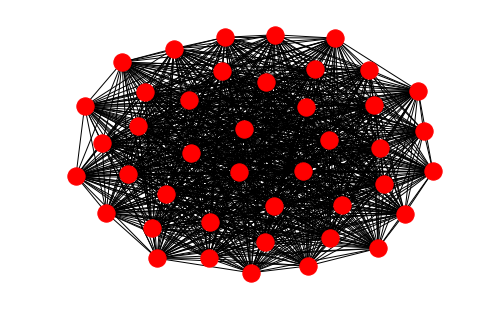

In [53]:
 %matplotlib inline
 nx.draw(friend_graph)